In [2]:
# QUES.1 Write a Python code to implement the KNN classifier algorithm on load_iris dataset in
# sklearn.datasets.
# ANSWER 
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [4]:
# QUES.2 Write a Python code to implement the KNN regressor algorithm on load_boston dataset in
# sklearn.datasets.
# ANSWER 
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.4324216146043236


The optimal number of neighbors is 13


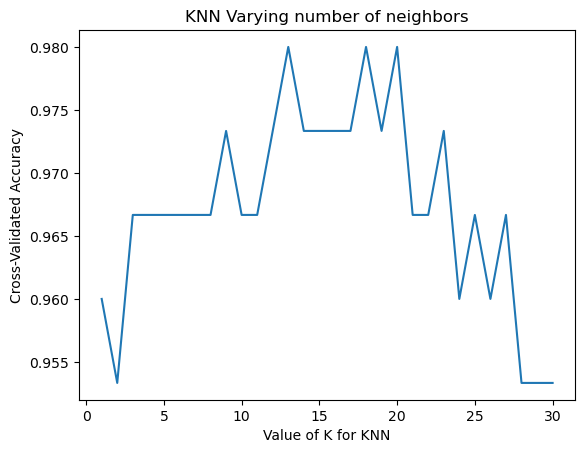

In [5]:
# QUES.3 Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using
# cross-validation on load_iris dataset in sklearn.datasets.
# ANSWER 
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define a range of K values to test
k_range = range(1, 31)

# List to store cross-validation scores for each K
cv_scores = []

# Perform cross-validation for each K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the K with the highest cross-validation score
optimal_k = k_range[np.argmax(cv_scores)]

print(f'The optimal number of neighbors is {optimal_k}')

# Plotting the results (optional)
import matplotlib.pyplot as plt

plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()


In [7]:
# QUES.4 Implement the KNN regressor algorithm with feature scaling on load_boston dataset in
# sklearn.datasets.
# ANSWER 
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementing the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.4324216146043236


In [8]:
# QUES.5 Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on
# load_iris dataset in sklearn.datasets.
# ANSWER 
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from collections import Counter

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the KNN classifier with weighted voting
class KNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute the distances between x and all examples in the training set
        distances = np.linalg.norm(self.X_train - x, axis=1)
        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:self.n_neighbors]
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = self.y_train[k_indices]
        # Get the distances of the k-nearest neighbors
        k_nearest_distances = distances[k_indices]
        # Compute the weights (inverse of distance)
        weights = 1 / (k_nearest_distances + 1e-5)  # Add a small value to avoid division by zero
        # Compute the weighted vote
        weighted_vote = Counter()
        for label, weight in zip(k_nearest_labels, weights):
            weighted_vote[label] += weight
        # Return the label with the highest weighted vote
        return weighted_vote.most_common(1)[0][0]

# Create the KNN classifier
knn = KNNClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [9]:
# QUES.6 Implement a function to standardise the features before applying KNN classifier.
# ANSWER 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def knn_with_standardization(X, y, n_neighbors=5, test_size=0.2, random_state=None):
    """
    Applies KNN classifier after standardizing the features.

    Parameters:
    X (array-like): Feature matrix.
    y (array-like): Target vector.
    n_neighbors (int): Number of neighbors for KNN.
    test_size (float): Proportion of the dataset to include in the test split.
    random_state (int, optional): Controls the shuffling applied to the data before applying the split.

    Returns:
    float: Accuracy of the KNN classifier on the test set.
    """

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate and return the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Example usage
if __name__ == "__main__":
    # Example data
    from sklearn.datasets import load_iris
    data = load_iris()
    X = data.data
    y = data.target

    accuracy = knn_with_standardization(X, y, n_neighbors=3, test_size=0.3, random_state=42)
    print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [ ]:
# QUES.